# Exploracion de datos

El primer paso en cualquier proyecto de aprendizaje automático es explorar los datos que usará para entrenar un modelo. El objetivo de esta exploración es intentar comprender las relaciones entre sus atributos; en particular, cualquier correlación aparente entre las características y la etiqueta que su modelo intentará predecir. Esto puede requerir algo de trabajo para detectar y corregir problemas en los datos (como tratar con valores perdidos, errores o valores atípicos), derivar nuevas columnas de características al transformar o combinar características existentes (un proceso conocido como ingeniería de características), normalizar características numéricas (valores que puede medir o contar) para que estén en una escala similar y codificar características categóricas (valores que representan categorías discretas) como indicadores numéricos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_data = pd.read_csv("./datasets/daily-bike-share.csv")
bike_data.head(20)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1   1/1/2011       1   0     1        0        6           0   
1         2   1/2/2011       1   0     1        0        0           0   
2         3   1/3/2011       1   0     1        0        1           1   
3         4   1/4/2011       1   0     1        0        2           1   
4         5   1/5/2011       1   0     1        0        3           1   
5         6   1/6/2011       1   0     1        0        4           1   
6         7   1/7/2011       1   0     1        0        5           1   
7         8   1/8/2011       1   0     1        0        6           0   
8         9   1/9/2011       1   0     1        0        0           0   
9        10  1/10/2011       1   0     1        0        1           1   
10       11  1/11/2011       1   0     1        0        2           1   
11       12  1/12/2011       1   0     1        0        3           1   
12       13  1/13/2011       1   0     1        0        4           1   
13       14  1/14/2011       1   0     1        0        5           1   
14       15  1/15/2011       1   0     1        0        6           0   
15       16  1/16/2011       1   0     1        0        0           0   
16       17  1/17/2011       1   0     1        1        1           0   
17       18  1/18/2011       1   0     1        0        2           1   
18       19  1/19/2011       1   0     1        0        3           1   
19       20  1/20/2011       1   0     1        0        4           1   

    weathersit      temp     atemp       hum  windspeed  rentals  
0            2  0.344167  0.363625  0.805833   0.160446      331  
1            2  0.363478  0.353739  0.696087   0.248539      131  
2            1  0.196364  0.189405  0.437273   0.248309      120  
3            1  0.200000  0.212122  0.590435   0.160296      108  
4            1  0.226957  0.229270  0.436957   0.186900       82  
5            1  0.204348  0.233209  0.518261   0.089565       88  
6            2  0.196522  0.208839  0.498696   0.168726      148  
7            2  0.165000  0.162254  0.535833   0.266804       68  
8            1  0.138333  0.116175  0.434167   0.361950       54  
9            1  0.150833  0.150888  0.482917   0.223267       41  
10           2  0.169091  0.191464  0.686364   0.122132       43  
11           1  0.172727  0.160473  0.599545   0.304627       25  
12           1  0.165000  0.150883  0.470417   0.301000       38  
13           1  0.160870  0.188413  0.537826   0.126548       54  
14           2  0.233333  0.248112  0.498750   0.157963      222  
15           1  0.231667  0.234217  0.483750   0.188433      251  
16           2  0.175833  0.176771  0.537500   0.194017      117  
17           2  0.216667  0.232333  0.861667   0.146775        9  
18           2  0.292174  0.298422  0.741739   0.208317       78  
19           2  0.261667  0.255050  0.538333   0.195904       83

- **instant:** un identificador de fila único
- **dteday:** la fecha en la que se observaron los datos; en este caso, los datos se recopilaron diariamente; por lo que hay una fila por fecha.
- **season:** un valor codificado numéricamente que indica la temporada (1: primavera, 2: verano, 3: otoño, 4: invierno)
- **yr:** el año del estudio en el que se realizó la observación (el estudio se llevó a cabo durante dos años; el año 0 representa 2011 y el año 1 representa 2012)
- **mnth:** El mes calendario en el que se realizó la observación (1: enero ... 12: diciembre)
- **holiday:** un valor binario que indica si la observación se realizó o no en un feriado público)
- **weekday:** el día de la semana en el que se realizó la observación (0: domingo ... 6: sábado)
- **workingday:** un valor binario que indica si el día es o no un día laborable (no un fin de semana o feriado)
- **weathersit:** Un valor categórico que indica la situación meteorológica (1: despejado, 2: niebla / nube, 3: lluvia ligera / nieve, 4: lluvia intensa / granizo / nieve / niebla)
- **temp:** La temperatura en grados Celsius (normalizada)
- **atemp:** La temperatura aparente ("se siente como") en grados Celsius (normalizada)
- **hum:** el nivel de humedad (normalizado)
- **windspeed:** la velocidad del viento (normalizada)
- **rentals:** el número de alquileres de bicicletas registrados.

En este conjunto de datos, **alquileres** representa la etiqueta (el valor *y*) que nuestro modelo debe estar capacitado para predecir. Las otras columnas son características potenciales (valores *x*).

Como se mencionó anteriormente, puede realizar alguna *ingeniería de funciones* para combinar o derivar nuevas funciones. Por ejemplo, agreguemos una nueva columna llamada **día** al marco de datos extrayendo el componente de día de la columna **dteday** existente. La nueva columna representa el día del mes del 1 al 31.

In [3]:
bike_data["day"] = pd.DatetimeIndex(bike_data["dteday"]).day

In [4]:
bike_data["season"] = bike_data["season"].astype(str)

In [5]:
bike_data.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
rentals         int64
day             int64
dtype: object

Bien, comencemos nuestro análisis de los datos examinando algunas estadísticas descriptivas clave. Podemos usar el método de descripción del marco de datos para generarlos para las características numéricas, así como para la columna de etiquetas de alquileres.

In [6]:
feutures = ["season", "temp", "atemp", "hum", "windspeed", "rentals"]
df_aux = bike_data[feutures]

df_groupby = df_aux.groupby(["season"]).agg({"temp": ["mean", "std", min, max],
                                             "atemp": ["mean", "std", "min", "max"], 
                                             "hum": ["mean", "std", "min", "max"], 
                                             "windspeed": ["mean", "std", "min", "max"]})
df_groupby

temp                                   atemp                      \
            mean       std       min       max      mean       std       min   
season                                                                         
1       0.297748  0.102735  0.059130  0.572500  0.296914  0.099026  0.079070   
2       0.544405  0.122650  0.253043  0.808333  0.520307  0.108022  0.250339   
3       0.706309  0.070848  0.469167  0.861667  0.655898  0.072056  0.242400   
4       0.422906  0.107834  0.220833  0.657500  0.415539  0.095536  0.227913   

                       hum                               windspeed            \
             max      mean       std       min       max      mean       std   
season                                                                         
1       0.548617  0.582903  0.151880  0.000000  0.948261  0.214537  0.086439   
2       0.757579  0.626948  0.152841  0.254167  0.922500  0.203507  0.071629   
3       0.840896  0.633482  0.119349  0.360000  0.939565  0.172095  0.059526   
4       0.607975  0.668719  0.131248  0.333478  0.972500  0.171995  0.081565   

                            
             min       max  
season                      
1       0.045408  0.507463  
2       0.065929  0.388067  
3       0.064071  0.375617  
4       0.022392  0.422275

In [7]:
df_aux.groupby(["season"])["temp"].mean()

season
1    0.297748
2    0.544405
3    0.706309
4    0.422906
Name: temp, dtype: float64

In [8]:
df_aux.groupby(["season"])["temp"].std()

season
1    0.102735
2    0.122650
3    0.070848
4    0.107834
Name: temp, dtype: float64

In [9]:
df_groupby[("temp", "coef_v_temp")] = (df_groupby[("temp", "std")]/df_groupby[("temp", "mean")])*100
df_groupby[("atemp", "coef_v_atemp")] = (df_groupby[("atemp", "std")]/df_groupby[("atemp", "mean")])*100
df_groupby[("hum", "coef_v_hum")] = (df_groupby[("hum", "std")]/df_groupby[("hum", "mean")])*100
df_groupby[("windspeed", "coef_v_windspeed")] = (df_groupby[("windspeed", "std")]/df_groupby[("windspeed", "mean")])*100

In [10]:
df_groupby.T

season                              1          2          3          4
temp      mean               0.297748   0.544405   0.706309   0.422906
          std                0.102735   0.122650   0.070848   0.107834
          min                0.059130   0.253043   0.469167   0.220833
          max                0.572500   0.808333   0.861667   0.657500
atemp     mean               0.296914   0.520307   0.655898   0.415539
          std                0.099026   0.108022   0.072056   0.095536
          min                0.079070   0.250339   0.242400   0.227913
          max                0.548617   0.757579   0.840896   0.607975
hum       mean               0.582903   0.626948   0.633482   0.668719
          std                0.151880   0.152841   0.119349   0.131248
          min                0.000000   0.254167   0.360000   0.333478
          max                0.948261   0.922500   0.939565   0.972500
windspeed mean               0.214537   0.203507   0.172095   0.171995
          std                0.086439   0.071629   0.059526   0.081565
          min                0.045408   0.065929   0.064071   0.022392
          max                0.507463   0.388067   0.375617   0.422275
temp      coef_v_temp       34.504068  22.529171  10.030667  25.498250
atemp     coef_v_atemp      33.351626  20.761175  10.985858  22.990800
hum       coef_v_hum        26.055749  24.378524  18.840098  19.626767
windspeed coef_v_windspeed  40.290853  35.197075  34.589316  47.422870

In [11]:
df_groupby.drop("temp", level = 0, axis = 1)

atemp                                     hum                      \
            mean       std       min       max      mean       std       min   
season                                                                         
1       0.296914  0.099026  0.079070  0.548617  0.582903  0.151880  0.000000   
2       0.520307  0.108022  0.250339  0.757579  0.626948  0.152841  0.254167   
3       0.655898  0.072056  0.242400  0.840896  0.633482  0.119349  0.360000   
4       0.415539  0.095536  0.227913  0.607975  0.668719  0.131248  0.333478   

                 windspeed                                      atemp  \
             max      mean       std       min       max coef_v_atemp   
season                                                                  
1       0.948261  0.214537  0.086439  0.045408  0.507463    33.351626   
2       0.922500  0.203507  0.071629  0.065929  0.388067    20.761175   
3       0.939565  0.172095  0.059526  0.064071  0.375617    10.985858   
4       0.972500  0.171995  0.081565  0.022392  0.422275    22.990800   

              hum        windspeed  
       coef_v_hum coef_v_windspeed  
season                              
1       26.055749        40.290853  
2       24.378524        35.197075  
3       18.840098        34.589316  
4       19.626767        47.422870

In [12]:
# df_decribe = bike_data[numeric_feutures].describe().T
# df_decribe["coef_v"] = (df_decribe["std"]/df_decribe["mean"])*100
# df_decribe

NameError: name 'numeric_feutures' is not defined

Las estadísticas revelan alguna información sobre la distribución de los datos en cada uno de los campos numéricos, incluido el número de observaciones (hay 731 registros), la media, la desviación estándar, los valores mínimo y máximo y los valores de cuartil (los valores de umbral para 25%, 50%, que también es la mediana y el 75% de los datos). A partir de esto, podemos ver que el número medio de alquileres diarios es de alrededor de 848; pero hay una desviación estándar comparativamente grande, lo que indica una gran variación en la cantidad de alquileres por día.

Podríamos tener una idea más clara de la distribución de los valores de los alquileres visualizando los datos. Los tipos de gráficos comunes para visualizar distribuciones de datos numéricos son histogramas y diagramas de caja, así que usemos la biblioteca matplotlib de Python para crear uno de cada uno de estos para la columna de **alquileres**.

In [13]:
bike_data[bike_data["season"] == "1"]

instant      dteday season  yr  mnth  holiday  weekday  workingday  \
0          1    1/1/2011      1   0     1        0        6           0   
1          2    1/2/2011      1   0     1        0        0           0   
2          3    1/3/2011      1   0     1        0        1           1   
3          4    1/4/2011      1   0     1        0        2           1   
4          5    1/5/2011      1   0     1        0        3           1   
..       ...         ...    ...  ..   ...      ...      ...         ...   
726      727  12/27/2012      1   1    12        0        4           1   
727      728  12/28/2012      1   1    12        0        5           1   
728      729  12/29/2012      1   1    12        0        6           0   
729      730  12/30/2012      1   1    12        0        0           0   
730      731  12/31/2012      1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  rentals  day  
0             2  0.344167  0.363625  0.805833   0.160446      331    1  
1             2  0.363478  0.353739  0.696087   0.248539      131    2  
2             1  0.196364  0.189405  0.437273   0.248309      120    3  
3             1  0.200000  0.212122  0.590435   0.160296      108    4  
4             1  0.226957  0.229270  0.436957   0.186900       82    5  
..          ...       ...       ...       ...        ...      ...  ...  
726           2  0.254167  0.226642  0.652917   0.350133      247   27  
727           2  0.253333  0.255046  0.590000   0.155471      644   28  
728           2  0.253333  0.242400  0.752917   0.124383      159   29  
729           1  0.255833  0.231700  0.483333   0.350754      364   30  
730           2  0.215833  0.223487  0.577500   0.154846      439   31  

[181 rows x 15 columns]

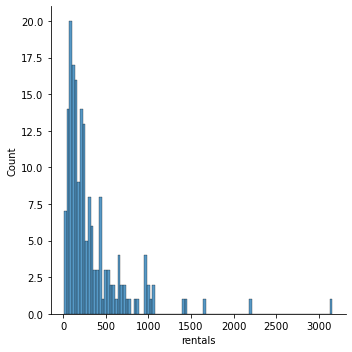

In [14]:
# una sola season
sns.displot(bike_data[bike_data["season"] == "1"]["rentals"], bins = 100)

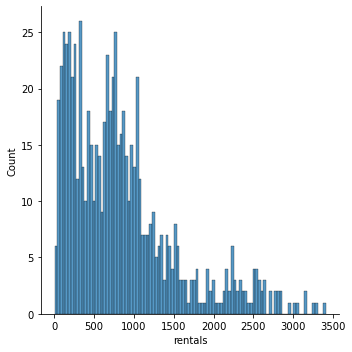

In [15]:
sns.displot(bike_data["rentals"], bins = 100);

In [16]:
def hist_boxplot(label = pd.Series):

    fig, axs = plt.subplots(2, 1, figsize = (7, 9))

    axs[0].hist(label, bins = 100)
    axs[0].set_ylabel("Frequency")
    axs[0].axvline(label.mean(), color = "magenta", linestyle = "dashed", linewidth = 1.5)
    axs[0].axvline(label.median(), color = "cyan", linestyle = "dashed", linewidth = 1.5)

    axs[1].boxplot(label, vert = False)
    axs[1].set_xlabel("Rentals")

    fig.suptitle("Renatl Distribution");


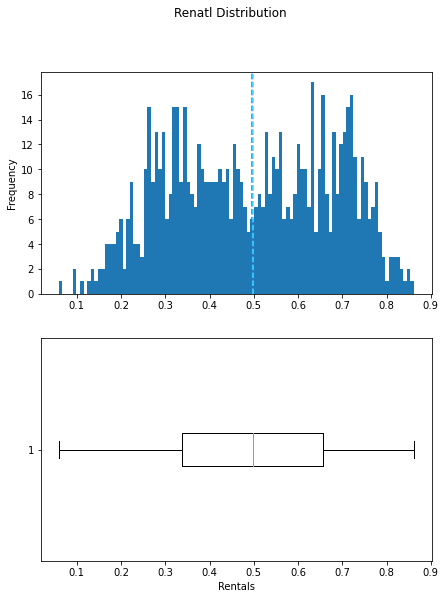

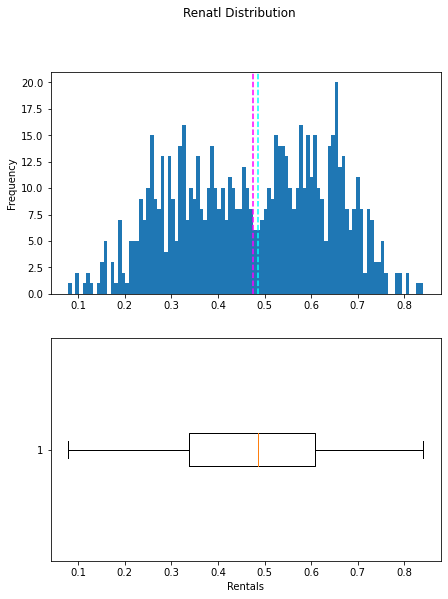

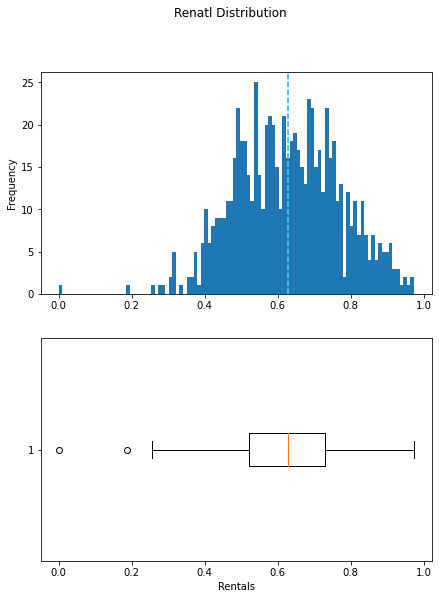

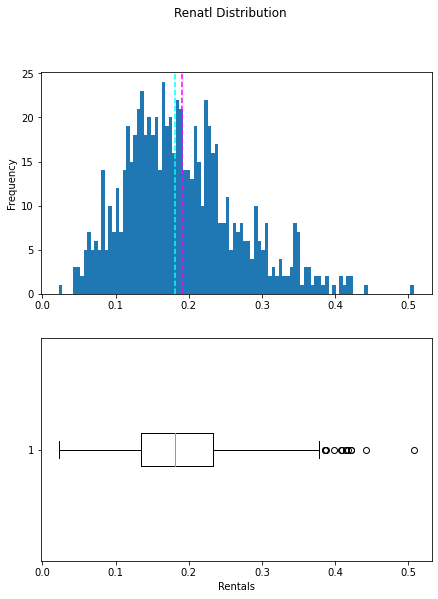

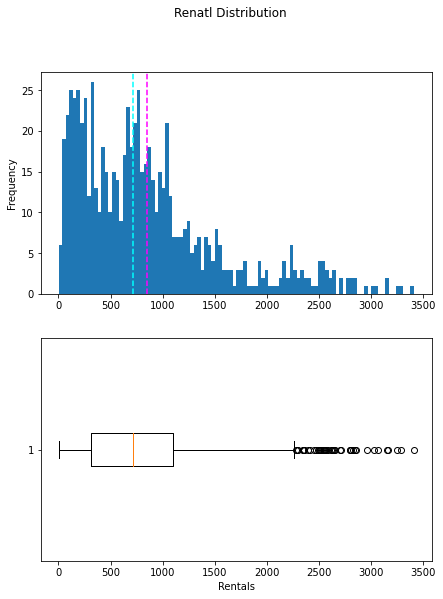

In [17]:
list_feutures = ["temp", "atemp", "hum", "windspeed", "rentals"]

for feature in list_feutures:
    
    hist_boxplot(label = bike_data[feature])
    

Las parcelas muestran que el número de alquileres diarios oscila entre 0 y poco más de 3.400. Sin embargo, el número medio (y mediano) de alquileres diarios está más cerca del extremo inferior de ese rango, con la mayoría de los datos entre 0 y alrededor de 2200 alquileres. Los pocos valores por encima de esto se muestran en el diagrama de caja como círculos pequeños, lo que indica que son * valores atípicos *, en otras palabras, valores inusualmente altos o bajos más allá del rango típico de la mayoría de los datos.

Podemos hacer el mismo tipo de exploración visual de las características numéricas. Creemos un histograma para cada uno de estos.

In [18]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals', 'day'],
      dtype='object')

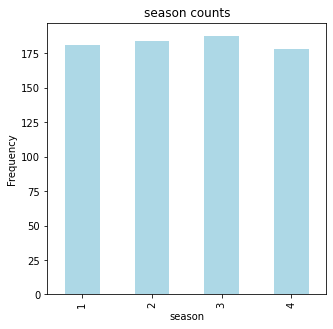

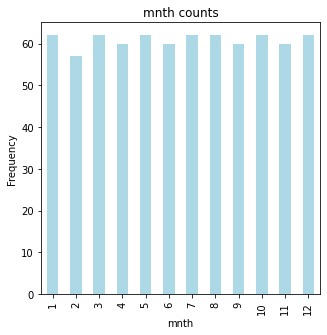

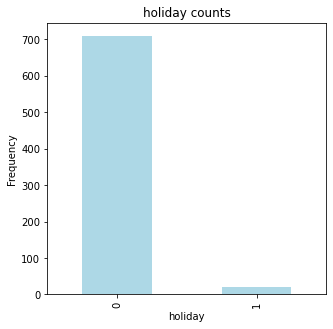

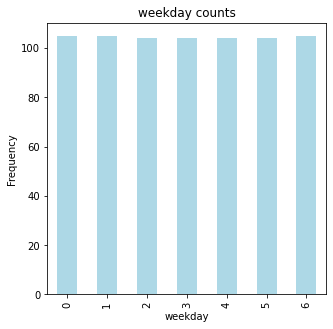

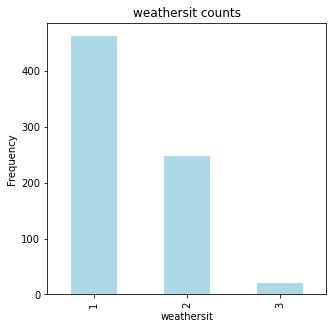

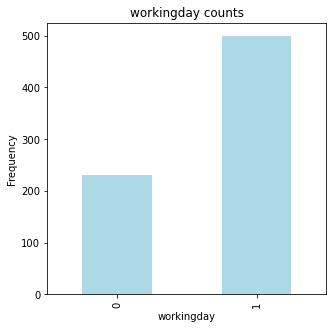

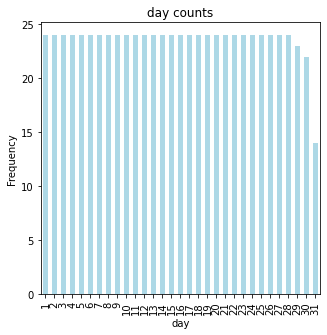

In [19]:
categorical_features = ["season", "mnth", "holiday", "weekday", "weathersit", "workingday", "day"]

for col in categorical_features:
    
    counts = bike_data[col].value_counts().sort_index()
    
    fig = plt.figure(figsize = (5, 5))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color = "lightblue")
    ax.set_title(col + " " + "counts")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency");

Las características numéricas parecen estar distribuidas más * normalmente *, con la media y la mediana más cerca de la mitad del rango de valores, coincidiendo con los valores que ocurren con mayor frecuencia.

> ** Nota **: Las distribuciones no son realmente * normales * en el sentido estadístico, lo que daría como resultado un histograma de "curva de campana" suave y simétrica con la media y la moda (el valor más común) en el centro; pero generalmente indican que la mayoría de las observaciones tienen un valor cercano al medio.

Hemos explorado la distribución de los valores numéricos en el conjunto de datos, pero ¿qué pasa con las características categóricas? Estos no son números continuos en una escala, por lo que no podemos usar histogramas; pero podemos trazar un gráfico de barras que muestre el recuento de cada valor discreto para cada categoría.

In [20]:
 bike_data["temp"].corr( bike_data["rentals"])

0.5432846616821875

In [21]:
 bike_data["atemp"].corr( bike_data["rentals"])

0.543863690262205

In [22]:
 bike_data["hum"].corr( bike_data["rentals"])

-0.07700788276308998

In [23]:
 bike_data["windspeed"].corr(bike_data["rentals"])

-0.16761334930380692

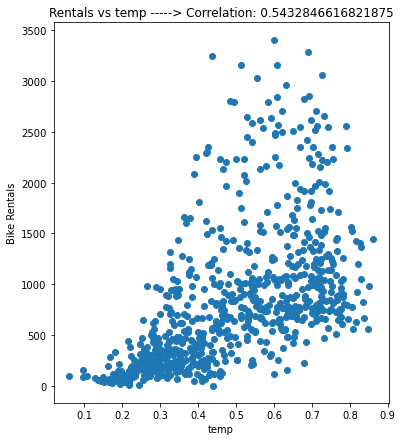

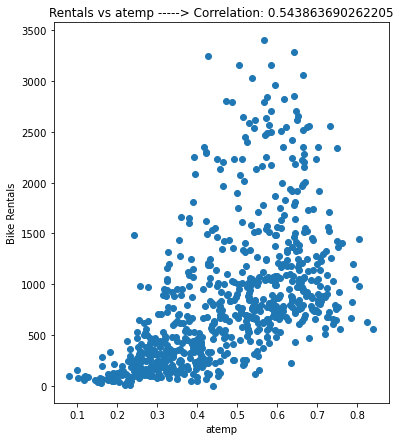

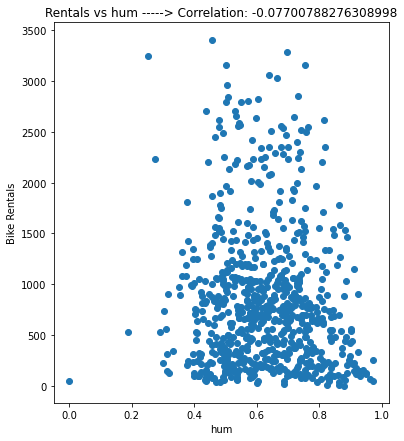

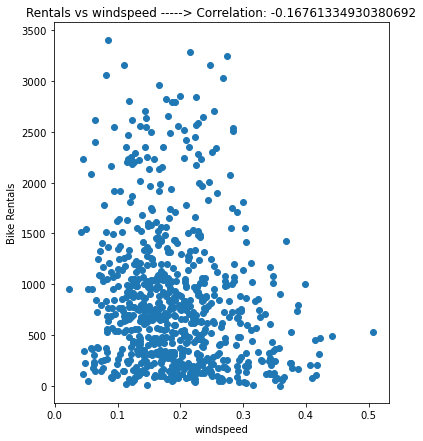

In [24]:
list_feature = ["temp", "atemp", "hum", "windspeed"]

for col in list_feature:
    
    fig = plt.figure(figsize = (6, 7))
    ax = fig.gca()
    
    feature = bike_data[col]
    label = bike_data["rentals"]
    
    correlation = feature.corr(label)
    plt.scatter(x = feature, y = label)
    
    plt.ylabel("Bike Rentals")
    plt.xlabel(col)
    title_vs = f"Rentals vs {col} -----> Correlation: {correlation}"
    ax.set_title(title_vs)

Muchas de las características categóricas muestran una distribución más o menos * uniforme * (lo que significa que hay aproximadamente el mismo número de filas para cada categoría). Las excepciones a esto incluyen:

- **holiday**: hay muchos menos días que son feriados que días que no lo son.
- **workingday**: Hay más días laborables que no laborables.
- **weathersit**: la mayoría de los días son de categoría * 1 * (despejado), siendo la categoría * 2 * (niebla y nube) la siguiente más común. Hay comparativamente pocos días de categoría * 3 * (lluvia ligera o nieve) y ningún día de categoría * 4 * (lluvia intensa, granizo o niebla).

Ahora que sabemos algo sobre la distribución de los datos en nuestras columnas, podemos comenzar a buscar relaciones entre las características y la etiqueta ** alquileres ** que queremos poder predecir.

Para las características numéricas, podemos crear diagramas de dispersión que muestren la intersección de los valores de características y etiquetas. También podemos calcular la estadística de * correlación * para cuantificar la relación aparente.

# Regression

Las técnicas de aprendizaje automático supervisado implican entrenar un modelo para operar en un conjunto de características y predecir una etiqueta utilizando un conjunto de datos que incluye algunos valores de etiqueta ya conocidos. El proceso de entrenamiento ajusta las características a las etiquetas conocidas para definir una función general que se puede aplicar a las nuevas características para las que las etiquetas son desconocidas y predecirlas. Puede pensar en esta función de esta manera, en la que **y** representa la etiqueta que queremos predecir y **x** representa las características que usa el modelo para predecirlo.

$$y = f(x)$$

En la mayoría de los casos, **x** es en realidad un **vector** que consta de múltiples valores de características, por lo que, para ser un poco más precisos, la función podría expresarse así:

$$y = f([x_1, x_2, x_3, ...])$$

El objetivo de entrenar el modelo es encontrar una función que realice algún tipo de cálculo de los valores **x** que produzca el resultado **y**. Hacemos esto aplicando un **algoritmo** de aprendizaje automático que intenta ajustar los valores **x** a un cálculo que produce **y** con una precisión razonable para todos los casos en el conjunto de datos de entrenamiento.

Hay muchos algoritmos de aprendizaje automático para el aprendizaje supervisado y se pueden dividir en dos tipos:

- **Algoritmos de regresión**: Algoritmos que predicen un valor **y** que es un valor numérico, como el precio de una casa o el número de transacciones de venta.
- **Algoritmos de clasificación**: Algoritmos que predicen a qué categoría, o **clase**, pertenece una observación. El valor **y** en un modelo de clasificación es un vector de valores de probabilidad entre 0 y 1, uno para cada clase, que indica la probabilidad de que la observación pertenezca a cada clase.

> **Citation**: The data used in this exercise is derived from [Capital Bikeshare](https://www.capitalbikeshare.com/system-data) and is used in accordance with the published [license agreement](https://www.capitalbikeshare.com/data-license-agreement).
<br>
<br>
<img alt="Colaboratory logo" src="LR.png" height = "500" width = "500">

## Train a Model

Existen conceptos clave que sientan las bases para una mejor comprensión del ML. Aprenderemos la nomenclatura (términos estándar) que se utiliza para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado.

<br>
<img alt="Colaboratory logo" src="tabla1.png" height = "700" width = "700">
<br>
<br>
<img alt="Colaboratory logo" src="train_test.png" height = "500" width = "500">

* **Instancia:** A una sola fila de datos se le llama instancia. También se le conoce como una observación del dominio.
* **Característica (Feature, labels):** A una sola columna de datos se le llama característica. Es un componente de una observación y también se denomina atributo de una instancia de datos (La característica se suele asociar con el atributo y su valor, aunque la mayoría de las veces se usa atributo y característica indistintamente). Algunas características pueden ser entradas a un modelo (predictores) y otras pueden ser salidas o las características a predecir (también llamadas *labels*).
* **Target (salida)**: es nuestra variable a predecir la cual tambien se conoce como variable target, salida, y_predict y entre otros. LA variable de salida del dataset siempre dependerá de que buscamos predecir, de un solo dataset pueden resultar distaintas variables de salidad y según sea nuestro objetivo escogeremos una variable u otra a predecir.
* **Datos de entrenamiento**: Conjunto de datos que introducimos a nuestro algoritmo para entrenar nuestro modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión de nuestro modelo pero que no se utiliza para entrenarlo. Puede llamarse conjunto de datos de validación.

### Tener en cuenta:

* **Cantidad insuficiente de datos de entrenamiento**: Se necesitan muchos datos para que la mayoría de los algoritmos de ML funcionen correctamente. Incluso para problemas muy simples, generalmente se necesitan miles de ejemplos, y para problemas complejos como el reconocimiento de imágenes o de voz puede necesitarse millones de ejemplos. 

* **Datos de entrenamiento no representativos**: Para generalizar bien, es crucial que los datos de entrenamiento sean representativos de los nuevos casos que desea generalizar. Al usar un conjunto de entrenamiento no representativo, entrenamos un modelo con el cual es poco probable obtener predicciones precisas. Incluso muestras muy grandes pueden no ser representativas si el método de muestreo es defectuoso (sesgo en el muestreo).

* **Datos de baja calidad**: Obviamente, si los datos de entrenamiento están llenos de errores, valores atípicos y ruido (por ejemplo, debido a mediciones de baja calidad), será más difícil para el algoritmo detectar los patrones subyacentes, por lo que es menos probable que funcione bien. ¡Siempre vale la pena dedicar tiempo a limpiar los datos de entrenamiento!

* **Características irrelevantes**: El sistema solo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes y no demasiadas irrelevantes. Una parte fundamental del éxito de un proyecto de ML es crear un buen conjunto de características para el entrenamiento. Este proceso se conoce como ingeniería de características. 

## Introducción a Sckit Learn

Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de ML. Uno de los más conocidos es Scikit-Learn, un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. La API de Scikit-Learn está notablemente bien diseñada. Los principales principios de diseño son:

* **Estimadores**: Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama *estimador*. La estimación en sí misma se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisados; el segundo conjunto de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro
* **Parámetros del modelo**: Son aquellos que pertenecen al modelo utilizado para realizar el procedimiento de ajuste
* **Hiperparámetros**: Es un parámetro de un algoritmo de aprendizaje (no del
modelo). Como tal, no se ve afectado por el algoritmo de aprendizaje en sí; debe establecerse antes
al entrenamiento y permanece constante durante el entrenamiento.
* **Métrica**: Medida cuantitativa usada para evaluar el rendimiento del algoritmo.

In [49]:
bike_data.head(20)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1   1/1/2011       1   0     1        0        6           0   
1         2   1/2/2011       1   0     1        0        0           0   
2         3   1/3/2011       1   0     1        0        1           1   
3         4   1/4/2011       1   0     1        0        2           1   
4         5   1/5/2011       1   0     1        0        3           1   
5         6   1/6/2011       1   0     1        0        4           1   
6         7   1/7/2011       1   0     1        0        5           1   
7         8   1/8/2011       1   0     1        0        6           0   
8         9   1/9/2011       1   0     1        0        0           0   
9        10  1/10/2011       1   0     1        0        1           1   
10       11  1/11/2011       1   0     1        0        2           1   
11       12  1/12/2011       1   0     1        0        3           1   
12       13  1/13/2011       1   0     1        0        4           1   
13       14  1/14/2011       1   0     1        0        5           1   
14       15  1/15/2011       1   0     1        0        6           0   
15       16  1/16/2011       1   0     1        0        0           0   
16       17  1/17/2011       1   0     1        1        1           0   
17       18  1/18/2011       1   0     1        0        2           1   
18       19  1/19/2011       1   0     1        0        3           1   
19       20  1/20/2011       1   0     1        0        4           1   

    weathersit      temp     atemp       hum  windspeed  rentals  day  
0            2  0.344167  0.363625  0.805833   0.160446      331    1  
1            2  0.363478  0.353739  0.696087   0.248539      131    2  
2            1  0.196364  0.189405  0.437273   0.248309      120    3  
3            1  0.200000  0.212122  0.590435   0.160296      108    4  
4            1  0.226957  0.229270  0.436957   0.186900       82    5  
5            1  0.204348  0.233209  0.518261   0.089565       88    6  
6            2  0.196522  0.208839  0.498696   0.168726      148    7  
7            2  0.165000  0.162254  0.535833   0.266804       68    8  
8            1  0.138333  0.116175  0.434167   0.361950       54    9  
9            1  0.150833  0.150888  0.482917   0.223267       41   10  
10           2  0.169091  0.191464  0.686364   0.122132       43   11  
11           1  0.172727  0.160473  0.599545   0.304627       25   12  
12           1  0.165000  0.150883  0.470417   0.301000       38   13  
13           1  0.160870  0.188413  0.537826   0.126548       54   14  
14           2  0.233333  0.248112  0.498750   0.157963      222   15  
15           1  0.231667  0.234217  0.483750   0.188433      251   16  
16           2  0.175833  0.176771  0.537500   0.194017      117   17  
17           2  0.216667  0.232333  0.861667   0.146775        9   18  
18           2  0.292174  0.298422  0.741739   0.208317       78   19  
19           2  0.261667  0.255050  0.538333   0.195904       83   20

In [38]:
bike_data["season"] = bike_data["season"].astype(int)

In [39]:
features = ["season", "mnth", "day", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp"]
X = bike_data[features]
X.head()

season  mnth  day  holiday  weekday  workingday  weathersit      temp  \
0       1     1    1        0        6           0           2  0.344167   
1       1     1    2        0        0           0           2  0.363478   
2       1     1    3        0        1           1           1  0.196364   
3       1     1    4        0        2           1           1  0.200000   
4       1     1    5        0        3           1           1  0.226957   

      atemp  
0  0.363625  
1  0.353739  
2  0.189405  
3  0.212122  
4  0.229270

In [41]:
target = ["rentals"]
y = bike_data[target]
y.head()

rentals
0      331
1      131
2      120
3      108
4       82

In [45]:
## otra forma
X, y = bike_data[features], bike_data[target]

In [46]:
X = X.values
print(X)

[[ 1.        1.        1.       ...  2.        0.344167  0.363625]
 [ 1.        1.        2.       ...  2.        0.363478  0.353739]
 [ 1.        1.        3.       ...  1.        0.196364  0.189405]
 ...
 [ 1.       12.       29.       ...  2.        0.253333  0.2424  ]
 [ 1.       12.       30.       ...  1.        0.255833  0.2317  ]
 [ 1.       12.       31.       ...  2.        0.215833  0.223487]]


In [44]:
y = y.values
y

array([[ 331],
       [ 131],
       [ 120],
       [ 108],
       [  82],
       [  88],
       [ 148],
       [  68],
       [  54],
       [  41],
       [  43],
       [  25],
       [  38],
       [  54],
       [ 222],
       [ 251],
       [ 117],
       [   9],
       [  78],
       [  83],
       [  75],
       [  93],
       [ 150],
       [  86],
       [ 186],
       [  34],
       [  15],
       [  38],
       [ 123],
       [ 140],
       [  42],
       [  47],
       [  72],
       [  61],
       [  88],
       [ 100],
       [ 354],
       [ 120],
       [  64],
       [  53],
       [  47],
       [ 149],
       [ 288],
       [ 397],
       [ 208],
       [ 140],
       [ 218],
       [ 259],
       [ 579],
       [ 532],
       [ 639],
       [ 195],
       [  74],
       [ 139],
       [ 100],
       [ 120],
       [ 424],
       [ 694],
       [  81],
       [ 137],
       [ 231],
       [ 123],
       [ 214],
       [ 640],
       [ 114],
       [ 244],
       [ 3

- Documentación de Scikit Learn: https://scikit-learn.org/stable/

Después de separar el conjunto de datos, ahora tenemos numerosas matrices llamadas **X** que contienen las características y **y** que contienen las etiquetas.

*Podríamos* entrenar un modelo usando todos los datos; pero es una práctica común en el aprendizaje supervisado dividir los datos en dos subconjuntos; un conjunto (normalmente más grande) con el que entrenar el modelo y un conjunto de "retención" más pequeño con el que validar el modelo entrenado. Esto nos permite evaluar qué tan bien se desempeña el modelo cuando se usa con el conjunto de datos de validación comparando las etiquetas predichas con las etiquetas conocidas. Es importante dividir los datos *al azar* (en lugar de decir, tomar el primer 70% de los datos para el entrenamiento y guardar el resto para la validación). Esto ayuda a garantizar que los dos subconjuntos de datos sean estadísticamente comparables (por lo que validamos el modelo con datos que tienen una distribución estadística similar a los datos sobre los que se entrenó).

Para dividir aleatoriamente los datos, usaremos la función **train_test_split** en la biblioteca **scikit-learn**. Esta biblioteca es uno de los paquetes de aprendizaje automático más utilizados para Python.

In [47]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state = 42)

Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train**: los valores de características que usaremos para entrenar el modelo
- **y_train**: Las etiquetas correspondientes que usaremos para entrenar el modelo
- **X_test**: los valores de características que usaremos para validar el modelo
- **y_test**: Las etiquetas correspondientes que usaremos para validar el modelo

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento. Usaremos un algoritmo de *regresión lineal*, un punto de partida común para la regresión que funciona tratando de encontrar una relación lineal entre los valores *X* y la etiqueta *y*. El modelo resultante es una función que define conceptualmente una línea en la que se cruzan todas las posibles combinaciones de valores de X e y.

En Scikit-Learn, los algoritmos de entrenamiento están encapsulados en *estimadores*, y en este caso usaremos el estimador **LinearRegression** para entrenar un modelo de regresión lineal.

In [53]:
from sklearn.linear_model import LinearRegression

In [79]:
model_LR = LinearRegression(n_jobs = -1, fit_intercept = False)
model_LR

LinearRegression(fit_intercept=False, n_jobs=-1)

In [80]:
linear_R_model = model_LR.fit(X_train, y_train)
linear_R_model

LinearRegression(fit_intercept=False, n_jobs=-1)

In [81]:
display(bike_data[features].head())
display(bike_data[target].head())

season  mnth  day  holiday  weekday  workingday  weathersit      temp  \
0       1     1    1        0        6           0           2  0.344167   
1       1     1    2        0        0           0           2  0.363478   
2       1     1    3        0        1           1           1  0.196364   
3       1     1    4        0        2           1           1  0.200000   
4       1     1    5        0        3           1           1  0.226957   

      atemp  
0  0.363625  
1  0.353739  
2  0.189405  
3  0.212122  
4  0.229270

rentals
0      331
1      131
2      120
3      108
4       82

In [82]:
linear_R_model.predict(np.array([4, 12, 16, 0, 4, 4, 1, 0.5, 0.5]).reshape(1, -1))

array([[-1603.5715699]])

In [83]:
print(X_test)

[[ 4.        12.         4.         0.         2.         1.
   1.         0.475833   0.469054 ]
 [ 1.         2.         3.         0.         4.         1.
   1.         0.186957   0.177878 ]
 [ 4.        10.        28.         0.         5.         1.
   2.         0.330833   0.318812 ]
 [ 2.         4.         1.         0.         0.         0.
   2.         0.425833   0.417287 ]
 [ 4.         9.        25.         0.         2.         1.
   1.         0.55       0.544179 ]
 [ 3.         7.        11.         0.         3.         1.
   1.         0.716667   0.650271 ]
 [ 1.         2.         9.         0.         3.         1.
   2.         0.134783   0.144283 ]
 [ 1.        12.        23.         0.         5.         1.
   1.         0.373333   0.377513 ]
 [ 3.         7.        13.         0.         5.         1.
   2.         0.731667   0.667933 ]
 [ 2.         5.        29.         0.         2.         1.
   1.         0.7225     0.672992 ]
 [ 1.        12.        30.   

In [84]:
predicciones = linear_R_model.predict(X_test)
predicciones

array([[ 588.30958894],
       [-190.13296358],
       [ 323.44172835],
       [ 978.26578142],
       [ 881.65989484],
       [1105.30591582],
       [-420.76753951],
       [ 284.66686022],
       [1142.20362708],
       [1105.43497338],
       [ 478.07790481],
       [ 247.3927208 ],
       [ 844.01647663],
       [ 248.35772925],
       [  35.9038459 ],
       [ 829.04280408],
       [  79.25495501],
       [1052.24523258],
       [1181.4482122 ],
       [ 326.62006723],
       [1101.37189353],
       [1620.01544322],
       [ 436.18885379],
       [-184.71484758],
       [  41.69386357],
       [1075.9446112 ],
       [ 189.648992  ],
       [ 721.5211497 ],
       [  44.43769283],
       [ 471.08751064],
       [ 752.59092501],
       [ 833.77634984],
       [ 636.27280569],
       [ 864.04244806],
       [ 459.6543633 ],
       [1524.85879947],
       [1102.90454312],
       [1882.26405227],
       [ 488.62541355],
       [-326.04240318],
       [ 865.23833711],
       [ -93.538

In [85]:
## evaluacion simple del modelo
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
mse = mean_squared_error(y_test, predicciones)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MSE: 148481.83370897334
RMSE: 385.33340590840726
R2: 0.6038594096054908
